# Beamforming and FFT

This notebook explains the relation between spatial beamforming and the time domain FFT operation and show how beamforming can be implemented using FFT. The content presented below is loosely based on a tutorial by [Prof. John R. Buck](https://twitter.com/ProfJohnRBuck) at [UMassD](https://www.umassd.edu).

This document is presented as an [IPython notebook](https://ipython.org/notebook.html). 

This [video](https://www.youtube.com/watch?v=DVi1TC24_BY) tutorial demonstrates how to setup Anaconda package for Python on a Windows machine. Similar approach is applicable for Linux and OSX platforms.


In [81]:
from IPython.display import YouTubeVideo
YouTubeVideo('DVi1TC24_BY')

## Discrete Fourier Transform (DFT) ##

Given a finite length discrete time sequence $x[m]$ for $0 \leq m \leq M - 1$, the discrete time fourier transform (DTFT) is defined as
$$X(e^{j\omega}) = \sum\limits_{m=0}^{M-1} x[n] e^{-jm\omega}.$$
$X(e^{j\omega})$ is a continuous function of $\omega$. 

The discrete fourier transform (DFT) can be viewed as the fequency domain sampling of DTFT every $\Delta\omega = 2\pi/N$. Time domain sampling results in creating copies of the spectrum in the frequency domain. Similarly, sampling in the frequency domain has an effect of creatign copies of the time domain sequence at every $N$. Hence to avoid aliasing in time, we need to choose $N \geq M$ to avoid aliasing in time. The DFT is defined as

$$ X[l] = X(e^{j\omega})\vert_{\omega = 2\pi l/N} $$

$$X[l] = \sum\limits_{n=0}^{N-1} x[n] e^{-j(2\pi/N)ln} \quad l = 0,\ldots, N-1$$

Above computation requries $\mathcal{O}(N^2)$.

Fast Fourier Trasform is a divide-and-conquer based approach to evaluate the DFT with fewer number of operation, specifically $\mathcal{O}(N\log_2 N)$.

finite length signals = finite aperture 



### Time domain
DTFT :

Frequency response: $H(e^{j\omega}) = \sum\limits_{m=0}^{M-1}h[m]e^{-j\omega m}$

$X_N[l] = DFT(x[m])$

## Spatial domain##
* Finite set of narrowband array data $\mathbf{x}$
* uniform line array (ULA)
* $u = \cos(\theta)$
* $k = 2\pi/\lambda$
$$
\begin{align}
[\mathbf{v}(\theta)]_n  =& [e^{j(2\pi d/\lambda)n\cos(\theta)}] \\
 =& [e^{j(2\pi d/\lambda)nu}]
\end{align}
$$

**Scanned response**
$$y = \mathbf{w}^{H}(u)\mathbf{x}$$

$$\mathbf{w}(u) = \frac{1}{M}[e^{-jkdmu}]$$
$$y(u) = \frac{1}{N}\sum\limits x_m e^{jkdmu}$$

**Beampattern**
Gain for each plane wave from different direction
$$B(u) = \mathbf{w}^{H}\mathbf{v}(u), \quad \text{for} -1\leq u \leq 1$$

$$ B(u) = \sum w^* e^{-jkdmu}$$

$\omega = kdu$ and $\Delta\omega = kd\Delta u = 2\pi/N$

fft(conj(w), N)

If $d = \lambda/2$ so that $kd = \pi$ then $\Delta \omega = \pi \Delta u$

**Side note**
* Need to be careful when $d \neq \lambda/2$, the FFT output will have invisible areas too.
* scanned response can be implemented as IFFT
* Test with non-symmetric scenario
* FFT is memory efficient, 'in place' 
* Creating exponential vectors will be memory intensive

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft, fftshift, ifft
from numpy.random import randn
%matplotlib notebook

In [83]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

** Function defines the steering/replica vector**

$[\mathbf{v}] = [e^{-j2\pi d/\lambda n \cos(\theta)}]$

In [84]:
def steering_vector(N, u, beta):
    # beta: sampling ratio, 1 => Nyquist sampling
    n = np.arange(0, N)
    sv = np.exp(-1j*np.pi*beta*u*n)
    return sv    

In [85]:
N = 11
sv = steering_vector(N, np.array(0), 1)
Nfft = 1024

**Direct implementation**

In [86]:
uscan = np.linspace(-1, 1, Nfft)
V = np.empty((11, Nfft), dtype=complex)
idx = 0
for u in uscan:
    V[:, idx] = steering_vector(11, u, 1)
    idx = idx + 1

BP = np.dot(sv/N, V)

**FFT based implementation**

In [87]:
u = np.linspace(-(Nfft-1)/2, Nfft/2, Nfft)*2/Nfft
BP_fft = (1/N)*fftshift(fft(sv, Nfft))

<IPython.core.display.Javascript object>


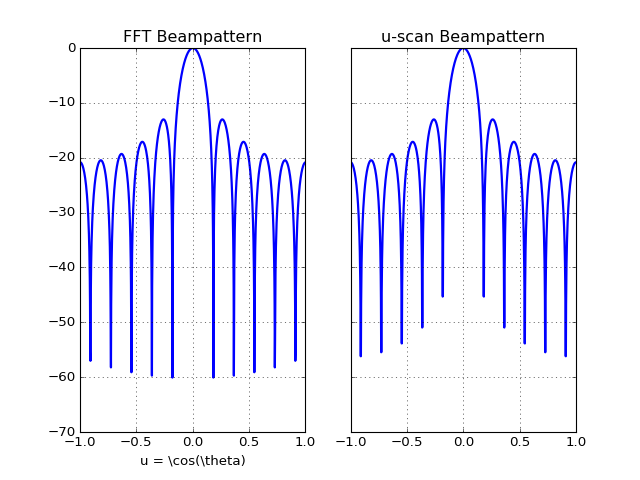

In [88]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(u, 20*np.log10(np.abs(BP_fft)), lw=2)
ax1.set_title('FFT Beampattern')
ax2.plot(uscan, 20*np.log10(np.abs(BP)), lw=2)
ax2.set_title('u-scan Beampattern')     
ax1.set_xlabel(r'u = \cos(\theta)')
ax1.grid(True)
ax2.grid(True)
ax1.set_xl

## Scan response example ##

<IPython.core.display.Javascript object>


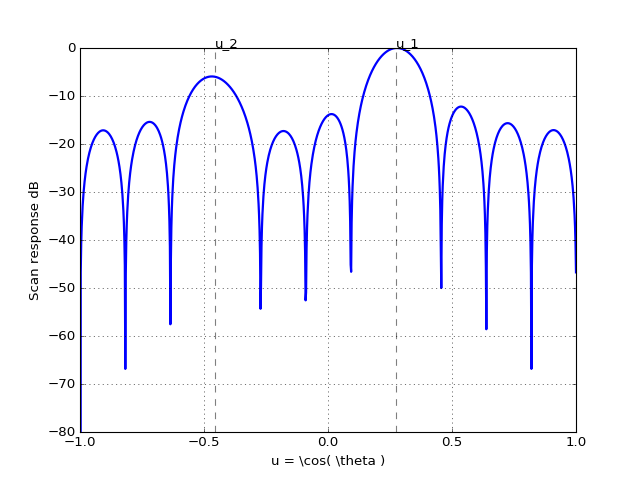

In [89]:
u1 = 3/11
u2 = -5/11
sv1 = steering_vector(N, u1, 1)
sv2 = steering_vector(N, u2, 1)
x = sv1 + 0.5*sv2
X = (Nfft/N)*fftshift(ifft(x, Nfft))

plt.figure()
plt.plot(u, 20*np.log10(np.abs(X)), lw=2)
plt.ylim((-80, 0))
plt.axvline(x=u1, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=u2, color='k', linestyle='--', alpha=0.5)
plt.grid(True)
plt.xlabel(r'u = \cos( \theta )')
plt.ylabel('Scan response dB')
plt.annotate('u_1', xy=(u1, 0.1), xytext=(u1, 0.2))
plt.annotate('u_2', xy=(u2, 0.1), xytext=(u2, 0.2))
#plt.savefig(filename='two_source_response.pdf', dpi=120)